# Assignment 2: Build a CNN for image recognition.

## Due Date:  March 29, 11:59PM

### Name: [Your-Name?]


## Introduction:

1. In this assignment, you will build Convolutional Neural Network to classify CIFAR-10 Images.
2. You can directly load dataset from many deep learning packages.
3. You can use any deep learning packages such as pytorch, keras or tensorflow for this assignment.

## Requirements:

1. You need to load cifar 10 data and split the entire training dataset into training and validation.
2. You will implement a CNN model to classify cifar 10 images with provided structure.
3. You need to plot the training and validation accuracy or loss obtained from above step.
4. Then you can use tuned parameters to train using the entire training dataset.
5. You should report the testing accuracy using the model with complete data.
6. You may try to change the structure (e.g, add BN layer or dropout layer,...) and analyze your findings.

## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

## Batch Normalization (BN)

### Background:

- Batch Normalization is a technique to speed up training and help make the model more stable.
- In simple words, batch normalization is just another network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the next hidden layer.

- For more detailed information, you may refer to the original paper: https://arxiv.org/pdf/1502.03167.pdf.

### BN Algorithm:

- Input: Values of $x$ over a mini-batch: $\mathbf{B}$ = $\{x_1,..., x_m\};$
- Output: $\{y_i = BN_{\gamma,\beta}(x_i)\}$, $\gamma, \beta$ are learnable parameters

Normalization of the Input:
$$\mu_{\mathbf{B}} = \frac{1}{m}\sum_{i=1}^m x_i$$
$$\sigma_{\mathbf{B}}^2 = \frac{1}{m}\sum_{i=1}^m (x_i - \mu_{\mathbf{B}})^2$$
$$\hat{x_i} = \frac{x_i - \mu_{\mathbf{B}}}{\sqrt{\sigma_{\mathbf{B}}}^2 + \epsilon}$$
Re-scaling and Offsetting:
$$y_i = \gamma \hat{x_i} + \beta = BN_{\gamma,\beta}(x_i)$$


### Advantages of BN:
1. Improves gradient flow through the network.
2. Allows use of saturating nonlinearities and higher learning rates.
3. Makes weights easier to initialize.
4. Act as a form of regularization and may reduce the need for dropout.

### Implementation:

- The batch normalization layer has already been implemented in many packages. You may simply call the function to build the layer. For example: torch.nn.BatchNorm2d() using pytroch package, keras.layers.BatchNormalization() using keras package.
- The location of BN layer: Please make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

## 1. Data preparation

### 1.1. Load data


In [15]:
# Load Cifar-10 Data
# This is just an example, you may load dataset from other packages.
from tensorflow import keras
import numpy as np
import pandas as pd
### If you can not load keras dataset, un-comment these two lines.
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels (5 points)

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Implement a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [2]:
for i in range(10):
    print(y_train[i])

[6]
[9]
[9]
[4]
[1]
[1]
[2]
[7]
[8]
[3]


In [3]:
def to_one_hot(y, num_class=10):
    y_train_new = np.zeros((len(y),num_class))
    for i in range(len(y)):
        array1 = [0 for x in range(10)]
        a = y[i]
        array1[a[0]] =1
        y_train_new[i] = array1
    return y_train_new
        
        

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets (5 points)

Randomly partition the 50K training samples to 2 sets: 
* a training set containing 40K samples: x_tr, y_tr
* a validation set containing 10K samples: x_val, y_val


In [4]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    random_indices = np.random.permutation(len(data))
    validation_set_size = int(len(data)*test_ratio)
    validation_indices = random_indices[:validation_set_size]
    train_indices = random_indices[validation_set_size:]
    return data[train_indices],data[validation_indices]

x_tr,x_val = split_train_test(x_train,0.2)
y_tr,y_val = split_train_test(y_train_vec,0.2)


print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters (50 points)

- Build a convolutional neural network model using the below structure:

- It should have a structure of: Conv - ReLU - Max Pool - ConV - ReLU - Max Pool - Dense - ReLU - Dense - Softmax

- In the graph 3@32x32 means the dimension of input image, 32@30x30 means it has 32 filters and the dimension now becomes 30x30 after the convolution.
- All convolutional layers (Conv) should have stride = 1 and no padding.
- Max Pooling has a pool size of 2 by 2.




<img src="network.PNG"/>

- You may use the validation data to tune the hyper-parameters (e.g., learning rate, and optimization algorithm)
- Do NOT use test data for hyper-parameter tuning!!!
- Try to achieve a validation accuracy as high as possible.

In [5]:
# Build the model
model = keras.models.Sequential([
    keras.layers.Conv2D(32,3, activation='relu',input_shape=[32,32,3]),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(64,4,activation='relu'),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

2022-03-29 16:31:58.215438: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Define model optimizer and loss function
from keras import optimizers
model.compile(optimizers.rmsprop_v2.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [8]:
# Train the model and store model parameters/loss values
history = model.fit(x_tr,y_tr,
                    batch_size=128, epochs =50,
                   validation_data=(x_val,y_val))

Epoch 1/50
313/313 [==============================] - 19s 59ms/step - loss: 4.2877 - accuracy: 0.2920 - val_loss: 1.8678 - val_accuracy: 0.3796
Epoch 2/50
313/313 [==============================] - 19s 59ms/step - loss: 1.6018 - accuracy: 0.4478 - val_loss: 1.5319 - val_accuracy: 0.4736
Epoch 3/50
313/313 [==============================] - 20s 62ms/step - loss: 1.3344 - accuracy: 0.5358 - val_loss: 1.4348 - val_accuracy: 0.5065
Epoch 4/50
313/313 [==============================] - 20s 63ms/step - loss: 1.1656 - accuracy: 0.5980 - val_loss: 1.3670 - val_accuracy: 0.5305
Epoch 5/50
313/313 [==============================] - 19s 62ms/step - loss: 1.0325 - accuracy: 0.6443 - val_loss: 1.4004 - val_accuracy: 0.5395
Epoch 6/50
313/313 [==============================] - 19s 62ms/step - loss: 0.9189 - accuracy: 0.6886 - val_loss: 1.3551 - val_accuracy: 0.5533
Epoch 7/50
313/313 [==============================] - 19s 61ms/step - loss: 0.8191 - accuracy: 0.7206 - val_loss: 1.3127 - val_accuracy:

In [9]:
model.save('Assignment_2_first_model.h5')
Assignment_2_first_model_train_loss = history.history['loss']
Assignment_2_first_model_val_loss = history.history['val_loss']
print('Assignment_2_first_model_train_loss ->',Assignment_2_first_model_train_loss,len(Assignment_2_first_model_train_loss))
print('Assignment_2_first_model_val_loss ->',Assignment_2_first_model_val_loss,len(Assignment_2_first_model_val_loss))


Assignment_2_first_model_train_loss -> [4.287698268890381, 1.6017961502075195, 1.3344250917434692, 1.1655800342559814, 1.0324889421463013, 0.9188665151596069, 0.8191154599189758, 0.7327010631561279, 0.6507695317268372, 0.5752825140953064, 0.508366048336029, 0.44309863448143005, 0.3894880414009094, 0.3404024839401245, 0.2924562692642212, 0.2502696216106415, 0.21474798023700714, 0.17958031594753265, 0.15080691874027252, 0.12552130222320557, 0.10282555222511292, 0.08474047482013702, 0.06976619362831116, 0.058530714362859726, 0.04886357858777046, 0.03924575075507164, 0.034725483506917953, 0.030157381668686867, 0.029425092041492462, 0.02246495708823204, 0.021160384640097618, 0.018627822399139404, 0.01759880594909191, 0.01583228074014187, 0.015167506411671638, 0.012239744886755943, 0.011631271801888943, 0.011531160213053226, 0.009783292189240456, 0.010483259335160255, 0.010564981959760189, 0.008432175032794476, 0.009430747479200363, 0.009432001039385796, 0.010240097530186176, 0.0084523512050

## 3. Plot the training and validation loss curve versus epochs. (5 points)

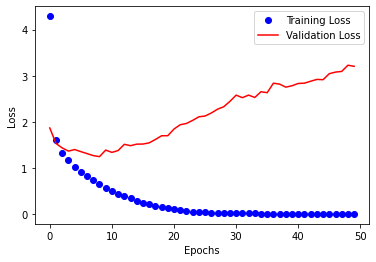

In [10]:
# Plot the loss curve
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,train_loss,'bo',label= 'Training Loss')
plt.plot(epochs,val_loss,'r',label= 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



## 4. Train (again) and evaluate the model (5 points)

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [11]:
#<Compile your model again (using the same hyper-parameters you tuned above)>
from keras import optimizers
model.compile(optimizers.rmsprop_v2.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [7]:
#<Train your model on the entire training set (50K samples)>
history2 = model.fit(x_train,y_train_vec,
                    batch_size=128, epochs =50)

Epoch 1/50
391/391 [==============================] - 26s 66ms/step - loss: 5.8414 - accuracy: 0.2744
Epoch 2/50
391/391 [==============================] - 27s 68ms/step - loss: 1.6306 - accuracy: 0.4472
Epoch 3/50
391/391 [==============================] - 39s 101ms/step - loss: 1.3131 - accuracy: 0.5448
Epoch 4/50
391/391 [==============================] - 30s 78ms/step - loss: 1.1372 - accuracy: 0.6071
Epoch 5/50
391/391 [==============================] - 30s 78ms/step - loss: 1.0013 - accuracy: 0.6551
Epoch 6/50
391/391 [==============================] - 30s 76ms/step - loss: 0.8900 - accuracy: 0.6941
Epoch 7/50
391/391 [==============================] - 30s 78ms/step - loss: 0.7919 - accuracy: 0.7297
Epoch 8/50
391/391 [==============================] - 29s 73ms/step - loss: 0.7069 - accuracy: 0.7593
Epoch 9/50
391/391 [==============================] - 28s 71ms/step - loss: 0.6287 - accuracy: 0.7875
Epoch 10/50
391/391 [==============================] - 27s 70ms/step - loss: 0.55

## 5. Evaluate the model on the test set (5 points)

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [8]:
# Evaluate your model performance (testing accuracy) on testing data.
loss_and_acc = model.evaluate(x_test,y_test_vec)
print('loss = ', str(loss_and_acc[0]))
print('accuracy = ', str(loss_and_acc[1]))


313/313 [==============================] - 3s 6ms/step - loss: 3.0351 - accuracy: 0.6519
loss =  3.035090684890747
accuracy =  0.6518999934196472


## 6. Building model with new structure (25 points)
- In this section, you can build your model with adding new layers (e.g, BN layer or dropout layer, ...).
- If you want to regularize a ```Conv/Dense layer```, you should place a ```Dropout layer``` before the ```Conv/Dense layer```.
- You can try to compare their loss curve and testing accuracy and analyze your findings.
- You need to try at lease two different model structures.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [19]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [20]:
datagen.fit(x_train)

In [28]:
history_4 = model.fit(datagen.flow(x_train, y_train_vec, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(x_train, y_train,
         batch_size=8, subset='validation'),
         steps_per_epoch=1000, epochs=100,validation_steps=50)

Epoch 1/100
1000/1000 [==============================] - 29s 29ms/step - loss: 0.9654 - accuracy: 0.6666 - val_loss: 215.4222 - val_accuracy: 0.0875
Epoch 2/100
1000/1000 [==============================] - 25s 25ms/step - loss: 0.9604 - accuracy: 0.6637 - val_loss: 238.4451 - val_accuracy: 0.0850
Epoch 3/100
1000/1000 [==============================] - 26s 26ms/step - loss: 0.9601 - accuracy: 0.6658 - val_loss: 216.2220 - val_accuracy: 0.1050
Epoch 4/100
1000/1000 [==============================] - 30s 30ms/step - loss: 0.9491 - accuracy: 0.6650 - val_loss: 223.5060 - val_accuracy: 0.0925
Epoch 5/100
1000/1000 [==============================] - 28s 28ms/step - loss: 0.9420 - accuracy: 0.6726 - val_loss: 220.2229 - val_accuracy: 0.1275
Epoch 6/100
1000/1000 [==============================] - 26s 26ms/step - loss: 0.9236 - accuracy: 0.6779 - val_loss: 238.8087 - val_accuracy: 0.1100
Epoch 7/100
1000/1000 [==============================] - 25s 25ms/step - loss: 0.9257 - accuracy: 0.6785 -

KeyboardInterrupt: 

In [24]:
# Build the model
model_2 = keras.models.Sequential([
    keras.layers.Conv2D(32,3, activation='relu',input_shape=[32,32,3]),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(64,4,activation='relu'),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [25]:
model_2.compile(optimizers.rmsprop_v2.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
# Train the model and store model parameters/loss values
history_2 = model_2.fit(x_tr,y_tr,
                    batch_size=128, epochs =50,
                   validation_data=(x_val,y_val))

Epoch 1/50
313/313 [==============================] - 22s 68ms/step - loss: 4.8816 - accuracy: 0.1761 - val_loss: 2.0141 - val_accuracy: 0.2594
Epoch 2/50
313/313 [==============================] - 21s 68ms/step - loss: 1.9510 - accuracy: 0.2949 - val_loss: 1.7518 - val_accuracy: 0.3686
Epoch 3/50
313/313 [==============================] - 32s 103ms/step - loss: 1.7874 - accuracy: 0.3540 - val_loss: 1.6454 - val_accuracy: 0.3972
Epoch 4/50
313/313 [==============================] - 28s 88ms/step - loss: 1.6994 - accuracy: 0.3863 - val_loss: 1.5444 - val_accuracy: 0.4477
Epoch 5/50
313/313 [==============================] - 27s 86ms/step - loss: 1.6268 - accuracy: 0.4150 - val_loss: 1.5173 - val_accuracy: 0.4584
Epoch 6/50
313/313 [==============================] - 24s 77ms/step - loss: 1.5733 - accuracy: 0.4332 - val_loss: 1.4781 - val_accuracy: 0.4653
Epoch 7/50
313/313 [==============================] - 24s 76ms/step - loss: 1.5201 - accuracy: 0.4560 - val_loss: 1.4037 - val_accuracy

In [ ]:
# Plot the loss curve
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)
train_loss

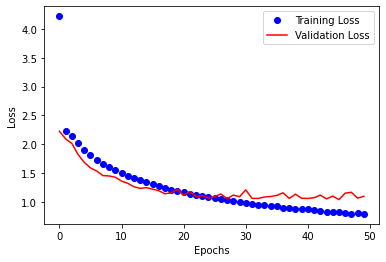

In [19]:
# Plot the loss curve
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)
train_loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']
plt.plot(epochs,train_loss_2,'bo',label= 'Training Loss')
plt.plot(epochs,val_loss_2,'r',label= 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
# Build the model
model_3 = keras.models.Sequential([
    keras.layers.Conv2D(32,3, activation='relu',input_shape=[32,32,3]),
    keras.layers.MaxPool2D(2),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(64,4,activation='relu'),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')
])

In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)             

In [22]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [16]:
model_3.compile(optimizers.rmsprop_v2.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
# Train the model and store model parameters/loss values
history_3 = model_2.fit(x_tr,y_tr,
                    batch_size=128, epochs =50,
                   validation_data=(x_val,y_val))

Epoch 1/50
313/313 [==============================] - 22s 71ms/step - loss: 0.7737 - accuracy: 0.7318 - val_loss: 1.0717 - val_accuracy: 0.6711
Epoch 2/50
313/313 [==============================] - 20s 65ms/step - loss: 0.7749 - accuracy: 0.7295 - val_loss: 1.0606 - val_accuracy: 0.6684
Epoch 3/50
313/313 [==============================] - 21s 68ms/step - loss: 0.7664 - accuracy: 0.7340 - val_loss: 1.1595 - val_accuracy: 0.6674
Epoch 4/50
313/313 [==============================] - 30s 96ms/step - loss: 0.7588 - accuracy: 0.7347 - val_loss: 1.0607 - val_accuracy: 0.6762
Epoch 5/50
313/313 [==============================] - 26s 83ms/step - loss: 0.7542 - accuracy: 0.7369 - val_loss: 1.1451 - val_accuracy: 0.6661
Epoch 6/50
313/313 [==============================] - 22s 71ms/step - loss: 0.7484 - accuracy: 0.7413 - val_loss: 1.0812 - val_accuracy: 0.6662
Epoch 7/50
313/313 [==============================] - 23s 72ms/step - loss: 0.7492 - accuracy: 0.7393 - val_loss: 1.2242 - val_accuracy:

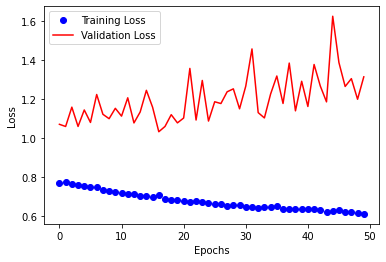

In [20]:
# Plot the loss curve
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)
train_loss_3 = history_3.history['loss']
val_loss_3 = history_3.history['val_loss']
plt.plot(epochs,train_loss_3,'bo',label= 'Training Loss')
plt.plot(epochs,val_loss_3,'r',label= 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
